# Data Analyst Professional Practical Exam Submission Szalka Áron

To get the Data Analyst Professional Certificaation from DataCamp, I had to analyse data and report it from a busieness point of view. At the end of it I also had to give some recommendations for the business and support my arguments with data-driven reasoning. This had to be done independently, only the task list and the dataset was given. Below is my solution.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

Data Valuation

The dataset cointains 15000 rows and 8 columns before cleaning and validation. I have validated the columns against the criteria in the dataset table.

week Values from 1 to 6, no missing values. No cleaning is needed.

sales_method No missing values, but some values that meant to be identical are written differently. In the cleaning process, they were matched.

customer_id No missing values, each value is unique.

nb_sold Values ranges from 7 to 16, no missing values. No changes were made.

revenue Values ranges from 32.54 to 238.32. Only 13926 values, the rest 1074 are missing. Since it's only 7.16% of the total records, these records were dropped.

years_as_customer No missing values, but two values e are bigger than the company's age. These two values are set to Na-s.

nb_site_visits No missing values, no cleaning is needed.

state No missing values, no cleaning is needed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('datacamp_data_analyst_professional_final_test_Szalka_Áron_data.csv')
df.loc[df['sales_method'] == 'em + call', 'sales_method'] = 'Email + Call'
df.loc[df['sales_method'] == 'email', 'sales_method'] = 'Email'
df = df.dropna(subset='revenue')
df['years_as_customer'] = df['years_as_customer'].apply(lambda x: x if x <= 39 else pd.NA)

**How sales methods distribute?**

As we can see on the first chart, most of the customers were targeted with the email only method, followed by the call only method and the fewest of the customers were targeted with the combination of the email and call. Since the call sales method is the most costly in time for the employees, here is room for reallocate those effors to the less costly email and call method and the most cost-efficient email only methods.

Text(0, 0.5, 'Count')

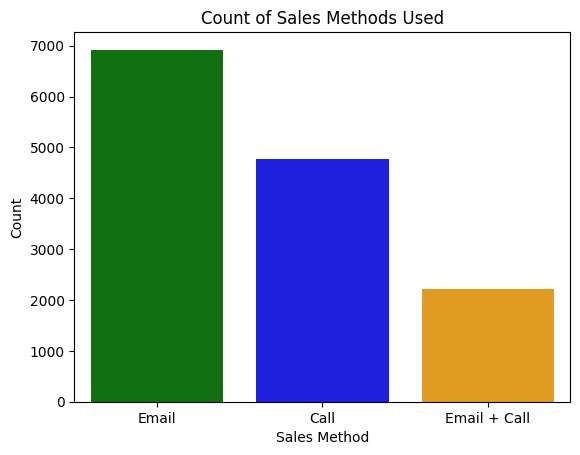

In [3]:
custom_palette = {'Email': 'green', 'Call': 'blue', 'Email + Call': 'orange'}
sns.set_palette(custom_palette.values())
sns.countplot(data = df, x = 'sales_method', order = df['sales_method'].value_counts().index)
plt.title('Count of Sales Methods Used')
plt.xlabel('Sales Method')
plt.ylabel('Count')

On the second plot the distribution of the revenue of the sales is displayed. Most of the revenues genereated by the sales are between 20 and 120, but there is a considereble amout of higher revenues generated by the sales up to 230. Our goal is to make high revenues by the sales so we would like to know which method generates higher revenues.

Text(0, 0.5, 'Count')

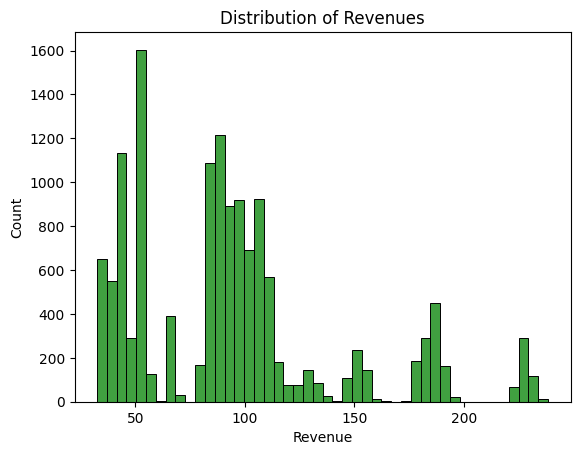

In [4]:
sns.histplot(data = df, x = 'revenue')
plt.title('Distribution of Revenues')
plt.xlabel('Revenue')
plt.ylabel('Count')

On this lineplot the revenues for the number of sold pieces is displayed. There is a clear connection between the the variables. The call only method makes the least revenue for each sold piece, the email only make more, and the conbined call + email makes the most revenue for every sold piece. This suggest that the combined method is the most efficitent.

Text(48.093913194444426, 0.5, 'Revenue')

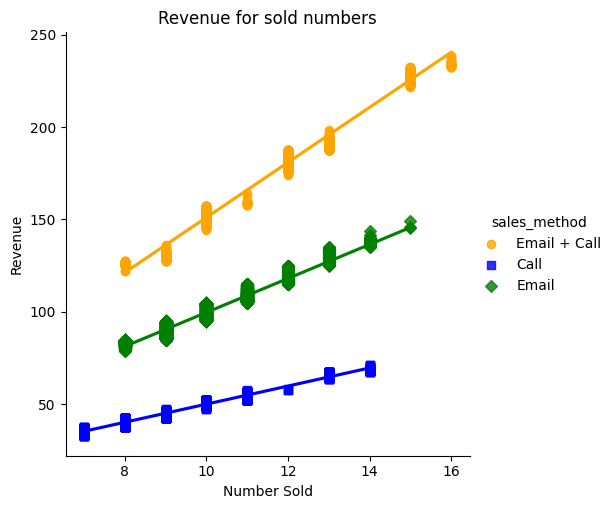

In [5]:
custom_palette = {'Email': 'green', 'Call': 'blue', 'Email + Call': 'orange'}
sns.set_palette(custom_palette.values())
scatterplot = sns.lmplot(data=df, y='revenue', x='nb_sold', hue='sales_method', markers=["o", "s", "D"], palette={'Email': 'green', 'Call': 'blue', 'Email + Call': 'orange'})
plt.title('Revenue for sold numbers')
plt.xlabel('Number Sold')
plt.ylabel('Revenue')

This boxplot makes the connection even more clear. The call only method altough very costly in time, makes a very little revenue on average, even the highest revenue it made is lower than any revenue by any other method. That makes the data a bit suspicious since from almost 14000 records there could be a few higher ones too just by chance. The email ony method makes better numbers for the company, but the combined call + email seems to be unbeatable.

Text(0.5, 0, 'Sales Method')

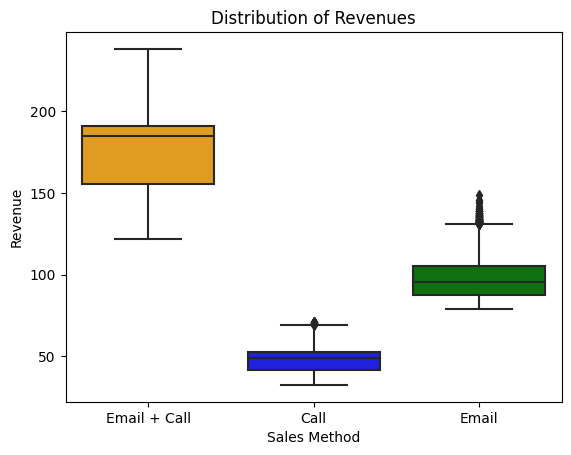

In [6]:
sns.boxplot(data = df, x = 'sales_method', y = 'revenue', palette={'Email': 'green', 'Call': 'blue', 'Email + Call': 'orange'})
plt.title('Distribution of Revenues')
plt.ylabel('Revenue')
plt.xlabel('Sales Method')

In the distribution of revenues histogram, the same relationship is also visible. The combined call + email method is making all the high revenues for the company, significantly higher than any other methods.

Text(0, 0.5, 'Count')

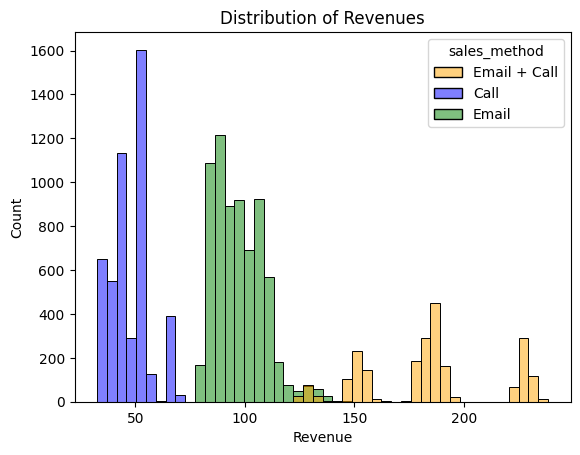

In [7]:
sns.histplot(data = df, x = 'revenue', hue = 'sales_method', palette={'Email': 'green', 'Call': 'blue', 'Email + Call': 'orange'})
plt.title('Distribution of Revenues')
plt.xlabel('Revenue')
plt.ylabel('Count')

Text(0, 0.5, 'Count')  In the final chart the revenues are displayed over time. All athe sales methods performed better over time, but the combined email + call method showed the biggest progress among the three. This further underscores its efficiency.

Text(48.093913194444426, 0.5, 'Revenue')

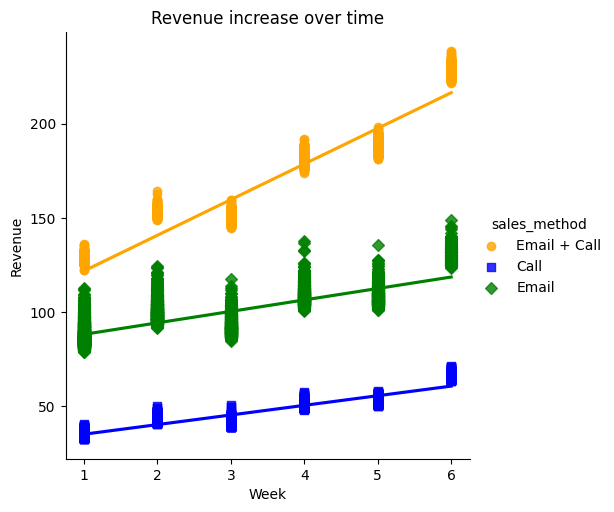

In [8]:
custom_palette = {'Email': 'green', 'Call': 'blue', 'Email + Call': 'orange'}
sns.set_palette(custom_palette.values())
scatterplot = sns.lmplot(data=df, y='revenue', x='week', hue='sales_method', markers=["o", "s", "D"], palette={'Email': 'green', 'Call': 'blue', 'Email + Call': 'orange'})
plt.title('Revenue increase over time')
plt.xlabel('Week')
plt.ylabel('Revenue')

**Metrics**

Since the aim of the company is to make as much revenue as possible from selling the equpiments, the ideal metric to measure success would be the average revenue per sale in the previous 6 weeks. 

Currently the company made 93.93 for each sale on average in the previous 6 weeks and this figure should be improved. If this number increases, it indicates a good sign to achieve our goal.

**Recommendations**

Having seen all these charts, it is safe to say, that the combined call + email sales method is very efficient. Altough a bit more time consuming for the employees than the email only method, the 10 minutes calls on average easily make up for the much higher revenues generated by these sales. The company should reorganise the workflow, from the long and time-consuming calls to the shorter calls combined with emails, use the email and call combined method only. We can expect higher revenues this way.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation